# Title of Project
By Rachel Truong  
Published August 2, 2024  

## Introduction
- play pokemon 
- struggle against another pokemon 
- wonder how to stop this 

### Motivation 
- wanted to do data-driven approach
- i just wanted play pokemon man
- ive never analyzed pokemon before
- this was me a week ago when playing pokemon
- literally had 1 pokemon on me who kept dying
- thus i decided to do this so i stop struggling as hard 

### Background
- make clear its main pokemon games, not pokemon go
- explain what pokemon is
- explain system of pokemon 

### Data Description and Source
For this project, I will be using PokeAPI, an API linked to multiple databases detailing everything about the Pokémon main game series. I will be specifically be using data from these databases: 
| Dataset | Description                                                                                         | Link                                           |
|---------|-----------------------------------------------------------------------------------------------------|------------------------------------------------|
| Pokemon | Database of all pokemon that exist in the game, as well as their stats                              | [API Docs](https://pokeapi.co/docs/v2#pokemon) | 
| Types   | Database of the pokemon types, and anything that relates to them (type effectiveness, Pokemon, etc) | [API Docs](https://pokeapi.co/docs/v2#types)   |

### Research Questions
- What is best typing?
- What is best stats?
- What is best pokemon to have on you when running into random pokemon and trainers

## Methods

### Library Imports

In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

### Data Preparation

In [2]:
# Getting the list of all Pokemon
url = "https://pokeapi.co/api/v2/pokemon?limit=100000&offset=0"
response = requests.get(url)
poke_url = response.json()['results']

# Getting the data for each Pokemon
poke_details = []
for pokemon in poke_url:
    response = requests.get(pokemon['url'])
    poke_details.append(response.json())

# Converting data to DataFrame
poke_df = pd.DataFrame(poke_details)

# Saving the data to a csv file (for cache reasons)
poke_df.to_json('data/pokemon_data.json', orient='records', lines=True)

For consistency's sake, I downloaded the dataframe I fetched so that I didnt have wait 3 minutes to run it all over again. 
The following code is to load 

In [34]:
# Loading the data from the csv file
poke_df = pd.read_json('data/pokemon_data.json', orient='records', lines=True)

In [35]:
# Taking a look at the data
poke_df.head()

,abilities,base_experience,cries,forms,game_indices,height,held_items,id,is_default,location_area_encounters,moves,name,order,past_abilities,past_types,species,sprites,stats,types,weight
0,"[{'ability': {'name': 'overgrow', 'url': 'http...",64.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'bulbasaur', 'url': 'https://pokeapi...","[{'game_index': 153, 'version': {'name': 'red'...",7,[],1,True,https://pokeapi.co/api/v2/pokemon/1/encounters,"[{'move': {'name': 'razor-wind', 'url': 'https...",bulbasaur,1,[],[],"{'name': 'bulbasaur', 'url': 'https://pokeapi....",{'back_default': 'https://raw.githubuserconten...,"[{'base_stat': 45, 'effort': 0, 'stat': {'name...","[{'slot': 1, 'type': {'name': 'grass', 'url': ...",69
1,"[{'ability': {'name': 'overgrow', 'url': 'http...",142.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'ivysaur', 'url': 'https://pokeapi.c...","[{'game_index': 9, 'version': {'name': 'red', ...",10,[],2,True,https://pokeapi.co/api/v2/pokemon/2/encounters,"[{'move': {'name': 'swords-dance', 'url': 'htt...",ivysaur,2,[],[],"{'name': 'ivysaur', 'url': 'https://pokeapi.co...",{'back_default': 'https://raw.githubuserconten...,"[{'base_stat': 60, 'effort': 0, 'stat': {'name...","[{'slot': 1, 'type': {'name': 'grass', 'url': ...",130
2,"[{'ability': {'name': 'overgrow', 'url': 'http...",263.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'venusaur', 'url': 'https://pokeapi....","[{'game_index': 154, 'version': {'name': 'red'...",20,[],3,True,https://pokeapi.co/api/v2/pokemon/3/encounters,"[{'move': {'name': 'swords-dance', 'url': 'htt...",venusaur,3,[],[],"{'name': 'venusaur', 'url': 'https://pokeapi.c...",{'back_default': 'https://raw.githubuserconten...,"[{'base_stat': 80, 'effort': 0, 'stat': {'name...","[{'slot': 1, 'type': {'name': 'grass', 'url': ...",1000
3,"[{'ability': {'name': 'blaze', 'url': 'https:/...",62.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'charmander', 'url': 'https://pokeap...","[{'game_index': 176, 'version': {'name': 'red'...",6,[],4,True,https://pokeapi.co/api/v2/pokemon/4/encounters,"[{'move': {'name': 'mega-punch', 'url': 'https...",charmander,5,[],[],"{'name': 'charmander', 'url': 'https://pokeapi...",{'back_default': 'https://raw.githubuserconten...,"[{'base_stat': 39, 'effort': 0, 'stat': {'name...","[{'slot': 1, 'type': {'name': 'fire', 'url': '...",85
4,"[{'ability': {'name': 'blaze', 'url': 'https:/...",142.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'charmeleon', 'url': 'https://pokeap...","[{'game_index': 178, 'version': {'name': 'red'...",11,[],5,True,https://pokeapi.co/api/v2/pokemon/5/encounters,"[{'move': {'name': 'mega-punch', 'url': 'https...",charmeleon,6,[],[],"{'name': 'charmeleon', 'url': 'https://pokeapi...",{'back_default': 'https://raw.githubuserconten...,"[{'base_stat': 58, 'effort': 0, 'stat': {'name...","[{'slot': 1, 'type': {'name': 'fire', 'url': '...",190


In [36]:
# Extra every type name into list for each Pokemon and replace the 'types' column
types_array = []
for value in poke_df['types']:
    types = []
    for attr in value: 
        types.append(attr['type']['name'])
    types_array.append(types)

poke_df['types'] = types_array
poke_df['types'].head()

0    [grass, poison]
1    [grass, poison]
2    [grass, poison]
3             [fire]
4             [fire]
Name: types, dtype: object

In [37]:
# Extract the stat.name and base_stat into a new DataFrame
stats_df = []
for row in poke_df['stats']:
    stats = {}
    for attr in row:
        stats[attr['stat']['name']] = attr['base_stat']
    stats["total"] = sum(stats.values())
    stats_df.append(stats)
 
# Convert stats_df to Pandas dataframe and merge with the original df
stats_df = pd.DataFrame(stats_df)
poke_df = pd.concat([poke_df, stats_df], axis=1)
poke_df.head()

,abilities,base_experience,cries,forms,game_indices,height,held_items,id,is_default,location_area_encounters,...,stats,types,weight,hp,attack,defense,special-attack,special-defense,speed,total
0,"[{'ability': {'name': 'overgrow', 'url': 'http...",64.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'bulbasaur', 'url': 'https://pokeapi...","[{'game_index': 153, 'version': {'name': 'red'...",7,[],1,True,https://pokeapi.co/api/v2/pokemon/1/encounters,...,"[{'base_stat': 45, 'effort': 0, 'stat': {'name...","[grass, poison]",69,45,49,49,65,65,45,318
1,"[{'ability': {'name': 'overgrow', 'url': 'http...",142.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'ivysaur', 'url': 'https://pokeapi.c...","[{'game_index': 9, 'version': {'name': 'red', ...",10,[],2,True,https://pokeapi.co/api/v2/pokemon/2/encounters,...,"[{'base_stat': 60, 'effort': 0, 'stat': {'name...","[grass, poison]",130,60,62,63,80,80,60,405
2,"[{'ability': {'name': 'overgrow', 'url': 'http...",263.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'venusaur', 'url': 'https://pokeapi....","[{'game_index': 154, 'version': {'name': 'red'...",20,[],3,True,https://pokeapi.co/api/v2/pokemon/3/encounters,...,"[{'base_stat': 80, 'effort': 0, 'stat': {'name...","[grass, poison]",1000,80,82,83,100,100,80,525
3,"[{'ability': {'name': 'blaze', 'url': 'https:/...",62.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'charmander', 'url': 'https://pokeap...","[{'game_index': 176, 'version': {'name': 'red'...",6,[],4,True,https://pokeapi.co/api/v2/pokemon/4/encounters,...,"[{'base_stat': 39, 'effort': 0, 'stat': {'name...",[fire],85,39,52,43,60,50,65,309
4,"[{'ability': {'name': 'blaze', 'url': 'https:/...",142.0,{'latest': 'https://raw.githubusercontent.com/...,"[{'name': 'charmeleon', 'url': 'https://pokeap...","[{'game_index': 178, 'version': {'name': 'red'...",11,[],5,True,https://pokeapi.co/api/v2/pokemon/5/encounters,...,"[{'base_stat': 58, 'effort': 0, 'stat': {'name...",[fire],190,58,64,58,80,65,80,405


In [38]:
# Keeping only the columns we need
poke_df = poke_df[['name', 'types', 'hp', 'attack', 'defense', 'speed', 'special-attack', 'special-defense', 'total']]
poke_df.head()

,name,types,hp,attack,defense,speed,special-attack,special-defense,total
0,bulbasaur,"[grass, poison]",45,49,49,45,65,65,318
1,ivysaur,"[grass, poison]",60,62,63,60,80,80,405
2,venusaur,"[grass, poison]",80,82,83,80,100,100,525
3,charmander,[fire],39,52,43,65,60,50,309
4,charmeleon,[fire],58,64,58,80,80,65,405


In [39]:
# checking for nulls
poke_df.isnull().sum()

name               0
types              0
hp                 0
attack             0
defense            0
speed              0
special-attack     0
special-defense    0
total              0
dtype: int64

### Understanding Data


his can include summary information about the data, summary statistics, an identification of where there may be missing/incorrect/outlier data, and data processing
    It should include at least 4 exploratory data visualizations

#### The Pokemon Database

General Stats

In [50]:
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             1302 non-null   object
 1   types            1302 non-null   object
 2   hp               1302 non-null   int64 
 3   attack           1302 non-null   int64 
 4   defense          1302 non-null   int64 
 5   speed            1302 non-null   int64 
 6   special-attack   1302 non-null   int64 
 7   special-defense  1302 non-null   int64 
 8   total            1302 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 91.7+ KB


In [53]:
poke_df.describe()

,hp,attack,defense,speed,special-attack,special-defense,total
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,71.264977,81.580645,75.241935,71.156682,73.649002,72.966974,445.860215
std,26.764202,31.673015,30.492559,30.310259,32.469611,27.358069,119.865940
min,1.000000,5.000000,5.000000,5.000000,10.000000,20.000000,175.000000
25%,54.000000,58.000000,53.000000,48.000000,50.000000,52.000000,335.000000
50%,70.000000,80.000000,70.000000,70.000000,65.000000,70.000000,470.000000
75%,85.000000,100.000000,95.000000,92.000000,95.000000,90.000000,525.000000
max,255.000000,190.000000,250.000000,200.000000,194.000000,250.000000,1125.000000


#### Distribution By Pokemon Stats

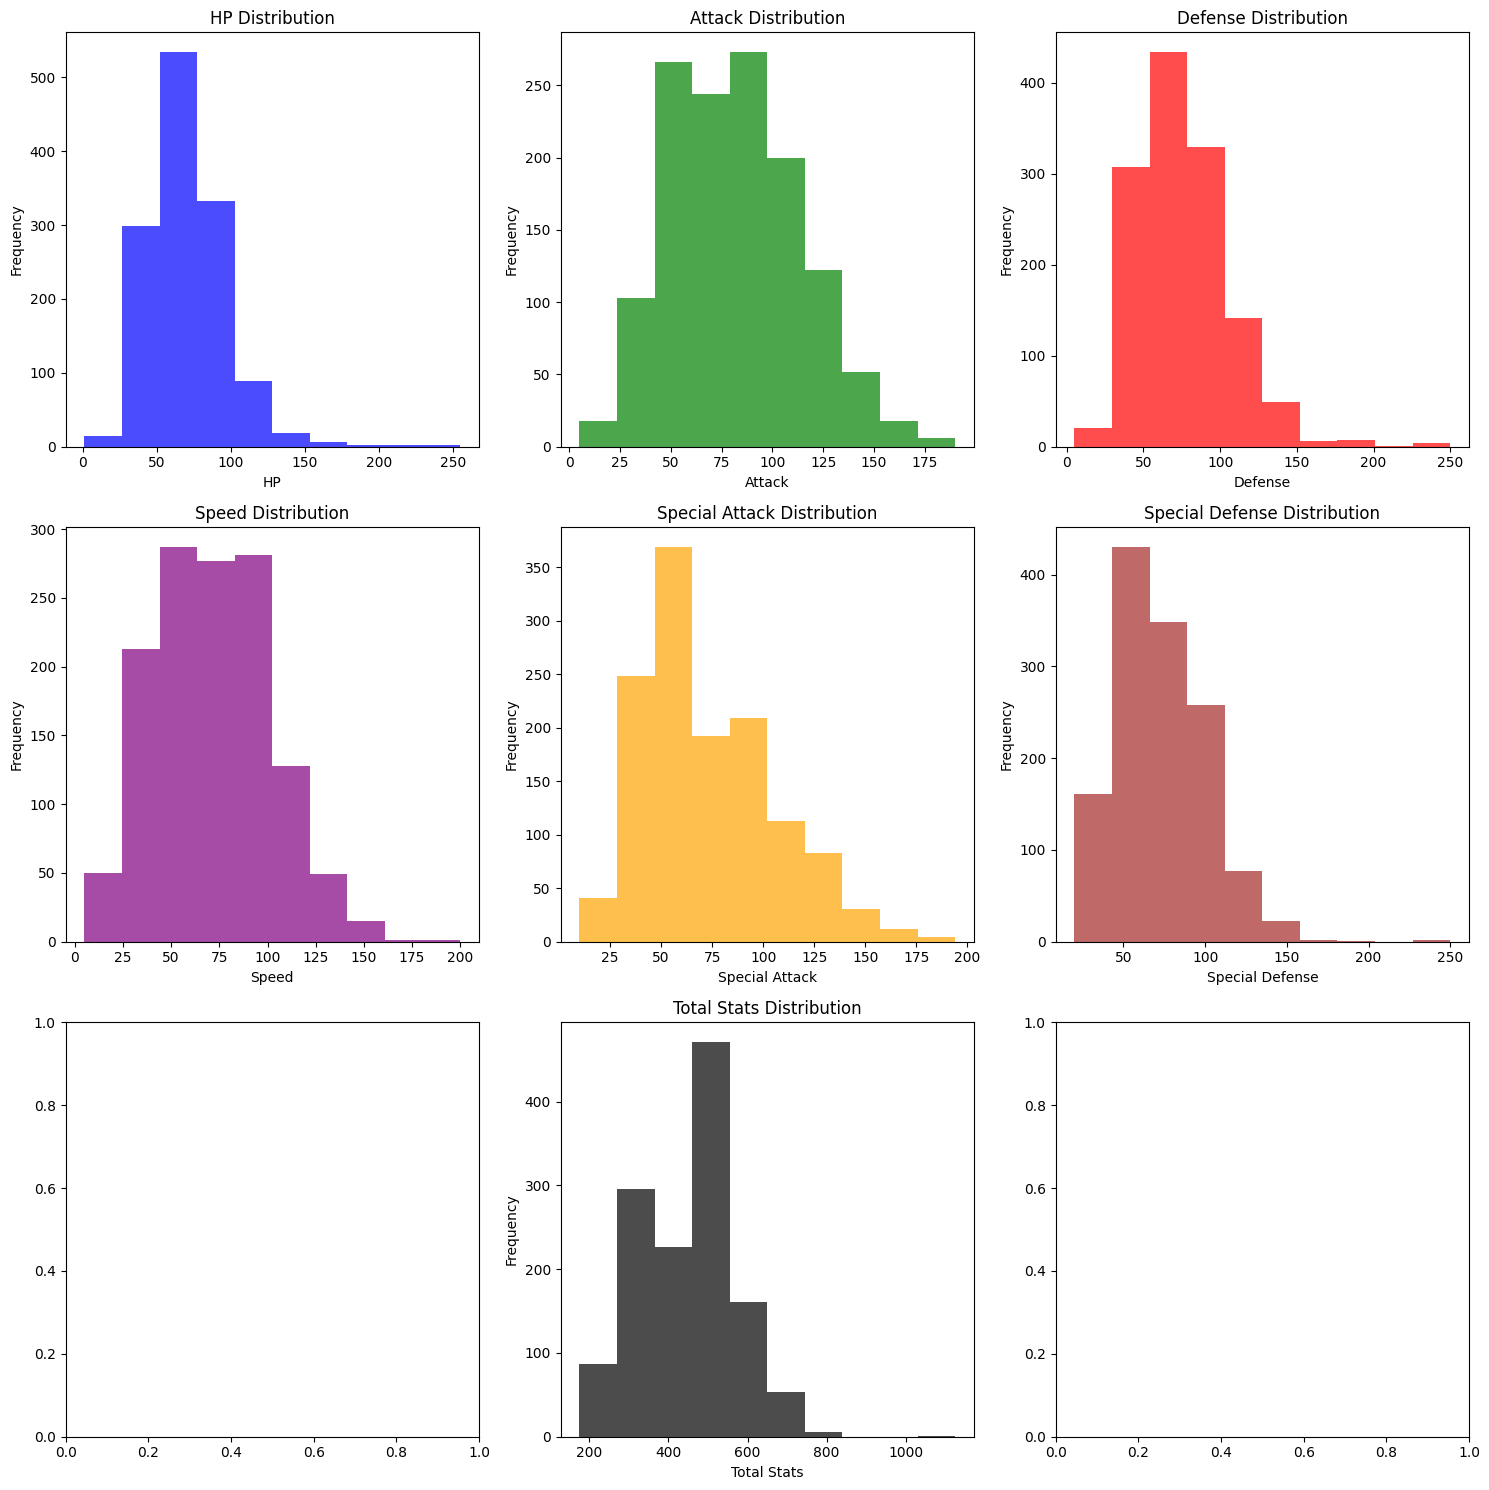

In [52]:
# Create 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15)) 

# Plot 1: Histogram of HP
axs[0, 0].hist(poke_df['hp'], color='blue', alpha=0.7)
axs[0, 0].set_title('HP Distribution')
axs[0, 0].set_xlabel('HP')
axs[0, 0].set_ylabel('Frequency')

# Plot 2: Histogram of Attack
axs[0, 1].hist(poke_df['attack'], color='green', alpha=0.7)
axs[0, 1].set_title('Attack Distribution')
axs[0, 1].set_xlabel('Attack')
axs[0, 1].set_ylabel('Frequency')

# Plot 3: Histogram of Defense
axs[0, 2].hist(poke_df['defense'], color='red', alpha=0.7)
axs[0, 2].set_title('Defense Distribution')
axs[0, 2].set_xlabel('Defense')
axs[0, 2].set_ylabel('Frequency')

# Plot 4: Histogram of Speed
axs[1, 0].hist(poke_df['speed'], color='purple', alpha=0.7)
axs[1, 0].set_title('Speed Distribution')
axs[1, 0].set_xlabel('Speed')
axs[1, 0].set_ylabel('Frequency')

# Plot 5: Histogram of Special Attack
axs[1, 1].hist(poke_df['special-attack'], color='orange', alpha=0.7)
axs[1, 1].set_title('Special Attack Distribution')
axs[1, 1].set_xlabel('Special Attack')
axs[1, 1].set_ylabel('Frequency')

# Plot 6: Histogram of Special Defense
axs[1, 2].hist(poke_df['special-defense'], color='brown', alpha=0.7)
axs[1, 2].set_title('Special Defense Distribution')
axs[1, 2].set_xlabel('Special Defense')
axs[1, 2].set_ylabel('Frequency')

# Plot 7: Histogram of Total Stats
axs[2, 1].hist(poke_df['total'], color='black', alpha=0.7)
axs[2, 1].set_title('Total Stats Distribution')
axs[2, 1].set_xlabel('Total Stats')
axs[2, 1].set_ylabel('Frequency')

# Adjust layout to prevent overlap and show plots
plt.tight_layout()
plt.show()

#### Pokemon Type Chart

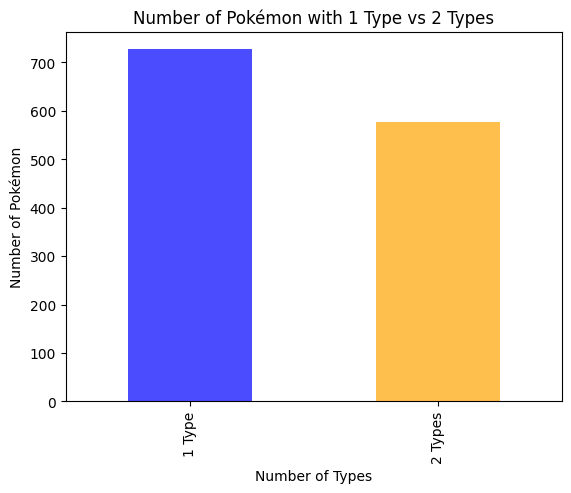

In [44]:
# Count the number of types each pokemon has 
num_types = [len(x) for x in poke_df['types']]

# Count the number of Pokémon with 1 type and 2 types
num_counts = pd.Series(num_types).value_counts()

# Plotting the bar graph
num_counts.plot(kind='bar', color=['blue', 'orange'], alpha=0.7)

# Display the plot
plt.xlabel('Number of Types')
plt.ylabel('Number of Pokémon')
plt.title('Number of Pokémon with 1 Type vs 2 Types')
plt.xticks(ticks=[0, 1], labels=['1 Type', '2 Types'])
plt.show()


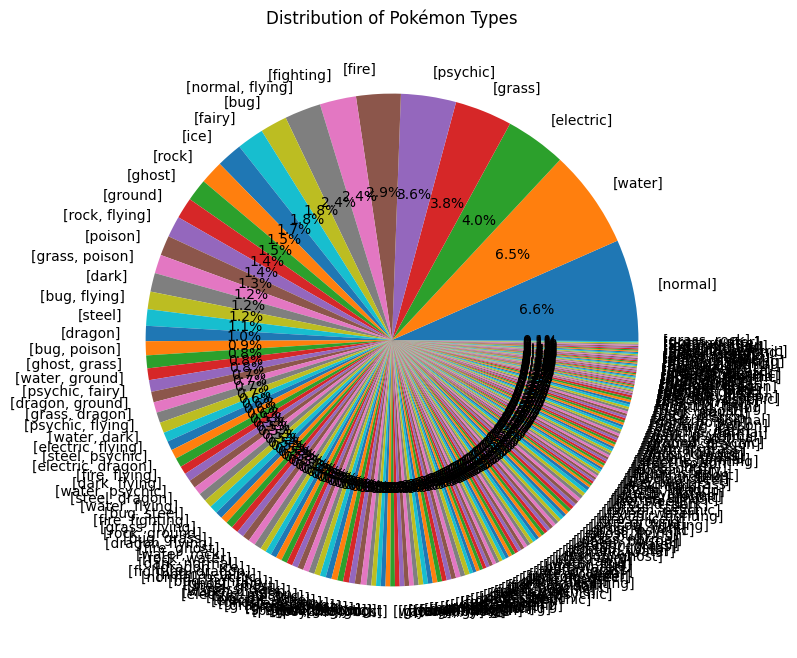

In [49]:
# Step 2: Count the occurrences of each type
type_counts = pd.Series(poke_df['types']).value_counts()

# Step 3: Plotting the pie chart
type_counts.plot(kind='pie', y='count', autopct='%1.1f%%', legend=False, figsize=(8, 8))

# Display the plot
plt.ylabel('')
plt.title('Distribution of Pokémon Types')
plt.show()

['grass', 'poison', 'grass', 'poison', 'grass', 'poison', 'fire', 'fire', 'fire', 'flying', 'water', 'water', 'water', 'bug', 'bug', 'bug', 'flying', 'bug', 'poison', 'bug', 'poison', 'bug', 'poison', 'normal', 'flying', 'normal', 'flying', 'normal', 'flying', 'normal', 'normal', 'normal', 'flying', 'normal', 'flying', 'poison', 'poison', 'electric', 'electric', 'ground', 'ground', 'poison', 'poison', 'poison', 'ground', 'poison', 'poison', 'poison', 'ground', 'fairy', 'fairy', 'fire', 'fire', 'normal', 'fairy', 'normal', 'fairy', 'poison', 'flying', 'poison', 'flying', 'grass', 'poison', 'grass', 'poison', 'grass', 'poison', 'bug', 'grass', 'bug', 'grass', 'bug', 'poison', 'bug', 'poison', 'ground', 'ground', 'normal', 'normal', 'water', 'water', 'fighting', 'fighting', 'fire', 'fire', 'water', 'water', 'water', 'fighting', 'psychic', 'psychic', 'psychic', 'fighting', 'fighting', 'fighting', 'grass', 'poison', 'grass', 'poison', 'grass', 'poison', 'water', 'poison', 'water', 'poison',

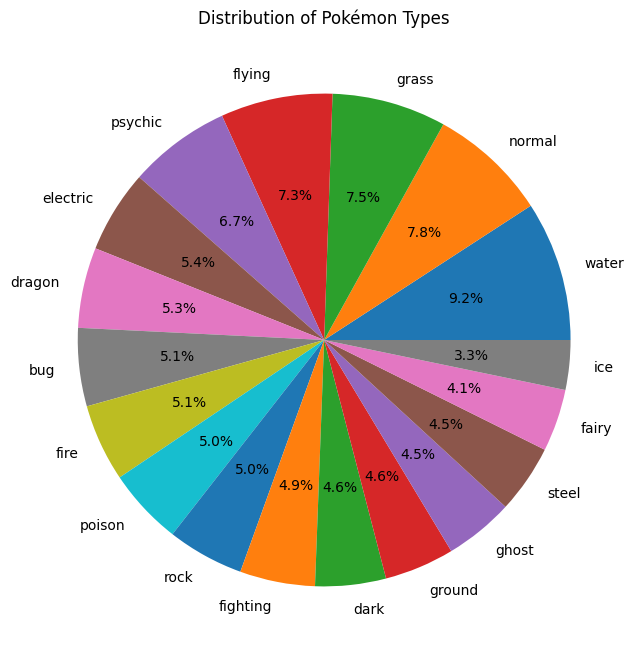

In [48]:
# Flatten nested list of types into a single list
all_types = [type_ for types_list in poke_df['types'] for type_ in types_list]
print(all_types)

# Step 2: Count the occurrences of each type
type_counts = pd.Series(all_types).value_counts()

# Step 3: Plotting the pie chart
type_counts.plot(kind='pie', y='count', autopct='%1.1f%%', legend=False, figsize=(8, 8))

# Display the plot
plt.ylabel('')
plt.title('Distribution of Pokémon Types')
plt.show()

## Analysis & Results
### Based on Typing

### Based on Base Stats

## Dicussion

### Conclusion

### References & Sources


what does your analysis show, what is the big picture, and how are these findings useful?